In [6]:
from pprint import pprint as pp
from copy import deepcopy as d
import matplotlib.pyplot as plt

def ps(game_state): # plot state
    plt.figure(figsize=(2,4))
    plt.axis([-1, 10, -1, 21])
    for i, row in enumerate(game_state):
        for j, col in enumerate(row):
            if game_state[i][j] == 1:
                plt.scatter(j,i)
    plt.show()

In [31]:
game_state = [[0] * 10 for _ in range(20)]
game_state_empty = d(game_state)

game_state[0] = [1]*10
game_state[1][1] = 1  # y then x
game_state[1][2] = 1
game_state[1][3] = 1
game_state[2][2] = 1
game_state[2][3] = 1
# game_state[5][5] = 1

# game_state[10] = [1]*10
# game_state[11] = [1,0,1,0,1,0,1,0,1,0]

game_state_x = d(game_state)

In [8]:
game_state_p = [
     [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
     [1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
     [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

In [9]:
pp(game_state_x)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


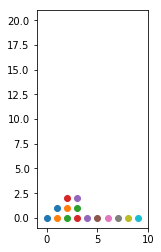

In [10]:
ps(game_state_x)

In [11]:
def resolve_rows(game_state):
    game_state = d(game_state)
    rows_to_remove = []
    for i,row in enumerate(game_state):
        if row == [1]*10:
            rows_to_remove.append(i)
            
    for row_num in rows_to_remove[::-1]:
        del game_state[row_num]
        
    for _ in range(len(rows_to_remove)):
        game_state.append([0]*10)
    
    return game_state

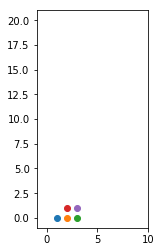

In [12]:
ps(resolve_rows(d(game_state)))

In [13]:
def calcuate_roof(game_state):
    game_state = d(game_state)
    columns = list(zip(*game_state))
#     print(columns)
    return [-column[::-1].index(max(column)) % 20 for column in columns]

In [14]:
calcuate_roof(game_state)

[1, 2, 3, 3, 1, 1, 1, 1, 1, 1]

In [15]:
def calculate_holes(game_state):
    game_state = d(game_state)
    
#     print("calculate_holes")
#     pp(game_state)

    difference_state = []
    for row_num in range(len(game_state)-1):
        row_difference = [x-y for x,y in zip(game_state[row_num], game_state[row_num+1])]
        difference_state.append(row_difference)
        
    number_of_holes = sum([i.count(-1) for i in difference_state])

#     pp(difference_state)
#     print(number_of_holes)
    
    return number_of_holes

In [16]:
print(calculate_holes(game_state))

0


In [17]:
def calculate_borders(game_state):
#     ps(game_state)
    game_state = d(game_state)
    borders = 0
    
    for row in game_state:
        borders += 10*[y-x for x,y in zip(row[1:], row[:-1])].count(-1)
        borders += 10*[y-x for x,y in zip(row[:-1], row[1:])].count(-1)
        
    for i,row in enumerate(game_state[:-1]):
        borders += [x-y for x,y in zip(row[1:], game_state[i+1][:-1])].count(-1)
        borders += [x-y for x,y in zip(row[:-1], game_state[i+1][1:])].count(-1)
        
    for i,row in enumerate(game_state[:-2]):
        borders += [x-y for x,y in zip(row[1:], game_state[i+2][:-1])].count(-1)
        borders += [x-y for x,y in zip(row[:-1], game_state[i+2][1:])].count(-1)
        
    for i,row in enumerate(game_state[:-3]):
        borders += [x-y for x,y in zip(row[1:], game_state[i+3][:-1])].count(-1)
        borders += [x-y for x,y in zip(row[:-1], game_state[i+3][1:])].count(-1)

    for i,row in enumerate(game_state[:-4]):
        borders += 10*[x-y for x,y in zip(row[1:], game_state[i+4][:-1])].count(-1)
        borders += 10*[x-y for x,y in zip(row[:-1], game_state[i+4][1:])].count(-1)
        
    return borders

In [18]:
pp(calculate_borders(game_state))

41


In [19]:
def add_element(game_state, block_char):
    game_state = d(game_state)
    # this is to try out all rotations (and then location)
    
    blocks = list("IJLOSTZ")
    block = blocks.index(block_char)
    
    scores = []
    moves = []
    
    for rotate in range(4):
        score, move = move_element(game_state, block, rotate)
        scores.append(score)
        moves.append(move)
        
    the_rotate = scores.index(min(scores))
    the_move = moves[the_rotate]
    
    game_state, score = drop_element(d(game_state), block, the_rotate, the_move, update=True)
    print("hole_score: ", calculate_holes(game_state))
    
#     game_state = resolve_rows(d(game_state))
#     print("add :", scores)
    
    return game_state, 10*the_rotate + the_move, score

In [20]:
def move_element(game_state, block, rotate):
    game_state = d(game_state)
    # this is to try out all location given block and rotation
    
    scores = []
    
#     ps(game_state)
    
    for move in range(10-widths[block][rotate]):
        scores.append(drop_element(game_state, block, rotate, move))
        
    move = scores.index(min(scores))
#     print("move :", scores)
    
    return min(scores),move

In [21]:
def drop_element(game_state, block, rotate, move, update=False):
    game_state = d(game_state)
    # this is to calculate the dropdown and how good it is
    
    block_cells = cells[block][rotate]
    block_bases = bases[block][rotate]
    
#     print(block_cells)
#     print(block_bases)
    
    height = calculate_drop_height(game_state, block, rotate, move)
    
    for point in block_cells:
        if point[1]+height >= 19:
            print("OVERFLOW")
        
        
        if game_state[point[1]+height][point[0]+move] != 0:  # row then column
            print("ERROR")
            print(point[1]+height, point[0]+move)
            print(game_state[point[1]+height][point[0]+move])
            
#         print(point[1]+height, point[0]+move)
#         print(game_state[point[1]+height][point[0]+move])    
        game_state[point[1]+height][point[0]+move] = 1
    
        if update:
            print([point[1]+height],[point[0]+move])
    

    
    score = 100000*calculate_holes(game_state) + calculate_borders(game_state)
    # discourages (especially) overhang and borders

    if update:
        return game_state, score
    
    return score

In [22]:
def calculate_drop_height(game_state, block, rotate, move):
    game_state = d(game_state)
    block_bases = bases[block][rotate]
    block_base_line = [point[1] for point in block_bases]
#     print(block_base_line)
    roof = calcuate_roof(game_state)
    
    relevant_roof = [roof[i+move] for i in range(len(block_base_line))]
    
#     print(block_base_line)
#     print(relevant_roof)
    
    difference = [(100*(x-y) - x) for x,y in zip(relevant_roof,block_base_line)]
    index = difference.index(max(difference))
    
    return relevant_roof[index]  # because do not add to existing space

In [23]:
calculate_drop_height(d(game_state_p), 4, 3, 3)

2

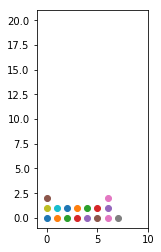

[3] [5]
[3] [6]
[3] [7]
[4] [6]


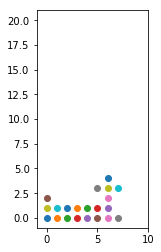

200101


In [24]:
ps(game_state_p)
game_state, score = drop_element(d(game_state_p), 5, 2, 5, update=True)
# game_state = drop_element(game_state, 5, 3, 0, update=False)
ps(game_state)
print(score)

### add element

[2] [1]
[2] [2]
[2] [3]
[3] [2]
hole_score:  0


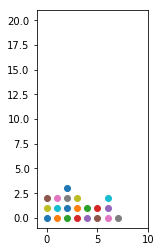

In [25]:
game_state, action, score = add_element(game_state_p, "T")
ps(game_state)

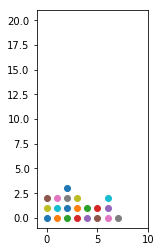

[1] [7]
[1] [8]
[0] [8]
[2] [8]
hole_score:  0
score : 93


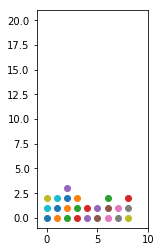

In [26]:
ps(game_state)
game_state, action, score = add_element(game_state, "T")
game_state = resolve_rows(game_state)
print("score :", score)
ps(game_state)

# The game

In [32]:
game_state = d(game_state_empty)

[3] [0]
[4] [0]
[5] [0]
[6] [0]
hole_score:  0
score: 97


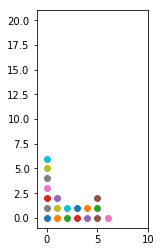

[2] [2]
[3] [2]
[2] [3]
[3] [3]
hole_score:  0
score: 118


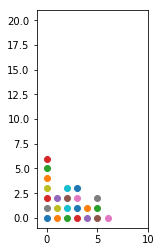

[0] [7]
[1] [7]
[0] [8]
[0] [9]
hole_score:  0
score: 128


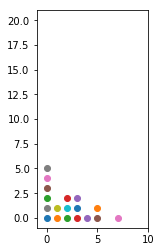

[2] [1]
[3] [1]
[3] [2]
[3] [3]
hole_score:  0
score: 105


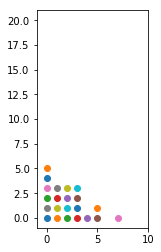

[2] [5]
[2] [6]
[1] [6]
[0] [6]
hole_score:  0
score: 106


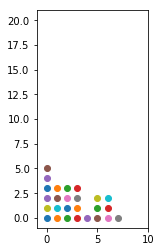

[6] [0]
[6] [1]
[5] [1]
[4] [1]
hole_score:  0
score: 118


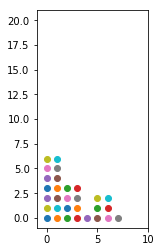

[1] [7]
[1] [8]
[0] [8]
[2] [8]
hole_score:  0
score: 140


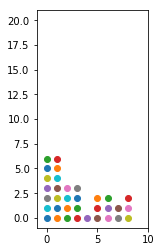

[1] [4]
[2] [4]
[3] [4]
[4] [4]
hole_score:  0
score: 117


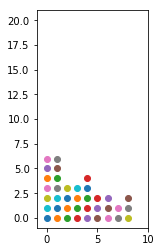

[4] [2]
[5] [2]
[4] [3]
[5] [3]
hole_score:  0
score: 94


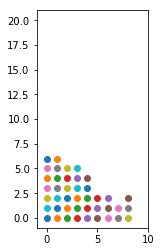

[3] [5]
[4] [5]
[3] [6]
[4] [6]
hole_score:  0
score: 96


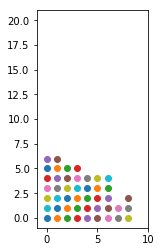

[2] [7]
[3] [7]
[4] [7]
[3] [8]
hole_score:  0
score: 76


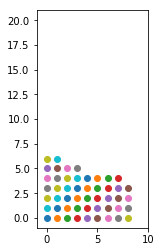

[0] [9]
[1] [9]
[2] [9]
[3] [9]
hole_score:  0
score: 30


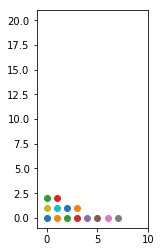

[0] [8]
[1] [8]
[0] [9]
[1] [9]
hole_score:  0
score: 30


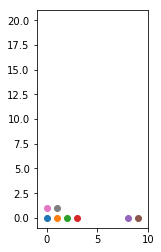

[0] [4]
[0] [5]
[0] [6]
[1] [5]
hole_score:  0
score: 50


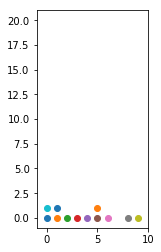

[2] [6]
[1] [6]
[1] [7]
[0] [7]
hole_score:  0
score: 50


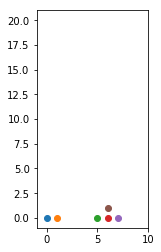

[1] [7]
[1] [8]
[0] [8]
[0] [9]
hole_score:  0
score: 40


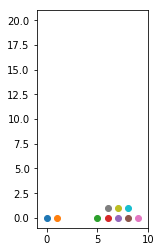

[0] [2]
[0] [3]
[0] [4]
[1] [3]
hole_score:  0
score: 40


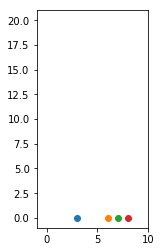

[1] [8]
[1] [9]
[0] [9]
[2] [9]
hole_score:  0
score: 50


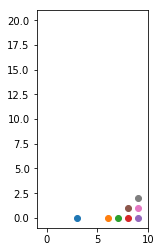

[0] [0]
[0] [1]
[0] [2]
[1] [1]
hole_score:  0
score: 60


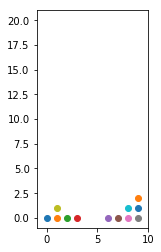

[0] [5]
[1] [5]
[1] [6]
[1] [7]
hole_score:  0
score: 61


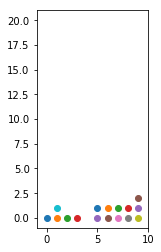

[2] [6]
[2] [7]
[2] [8]
[3] [8]
hole_score:  0
score: 81


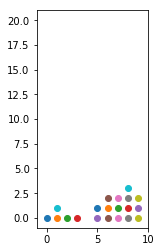

[1] [0]
[2] [0]
[3] [0]
[4] [0]
hole_score:  0
score: 104


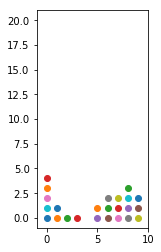

[1] [2]
[1] [3]
[1] [4]
[0] [4]
hole_score:  0
score: 63


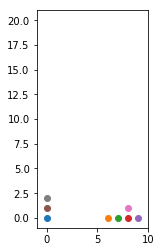

[0] [4]
[0] [5]
[1] [5]
[1] [6]
hole_score:  0
score: 83


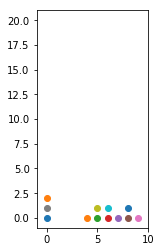

[0] [2]
[0] [3]
[1] [3]
[1] [4]
hole_score:  0
score: 83


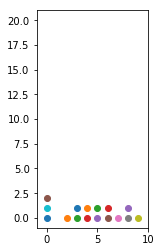

[0] [1]
[1] [1]
[2] [1]
[1] [2]
hole_score:  0
score: 40


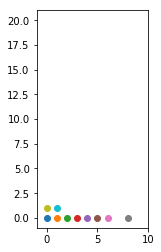

[1] [2]
[1] [3]
[1] [4]
[1] [5]
hole_score:  0
score: 40


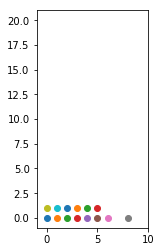

[1] [6]
[1] [7]
[0] [7]
[1] [8]
hole_score:  0
score: 21


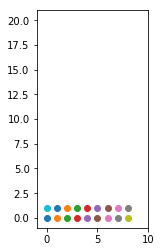

In [34]:
for block in list("IOJLLLTIOOTIOTZSTTTLLIJSZTIT"):
    game_state, action, score = add_element(game_state, block)
    game_state = resolve_rows(game_state)
    print("score:", score)
#     pp(game_state)
    ps(game_state)

# Game declaration

In [1]:
cells = [
    # I    
    [
        [(0,0), (0,1), (0,2), (0,3)],
        [(0,0), (1,0), (2,0), (3,0)],
        [(0,0), (0,1), (0,2), (0,3)],
        [(0,0), (1,0), (2,0), (3,0)]
    ],
    
    # j
    [
        [(0,0), (1,0), (1,1), (1,2)],
        [(0,0), (0,1), (1,0), (2,0)],
        [(0,0), (0,1), (0,2), (1,2)],
        [(0,1), (1,1), (2,1), (2,0)]
    ],
    
    # L
    [
        [(0,0), (1,0), (0,1), (0,2)],
        [(0,0), (0,1), (1,1), (2,1)],
        [(0,2), (1,2), (1,1), (1,0)],
        [(0,0), (1,0), (2,0), (2,1)]        
    ],
    
    
    # O
    [
        [(0,0), (0,1), (1,0), (1,1)],
        [(0,0), (0,1), (1,0), (1,1)],
        [(0,0), (0,1), (1,0), (1,1)],
        [(0,0), (0,1), (1,0), (1,1)]
    ],
    
    # S
    [
        [(0,0), (1,0), (1,1), (2,1)],
        [(0,2), (0,1), (1,1), (1,0)],
        [(0,1), (1,1), (1,0), (2,0)],
        [(0,0), (0,1), (1,1), (1,2)]
    ],
    
    # T
    [
        [(0,1), (1,1), (1,0), (2,1)],
        [(0,1), (1,1), (1,0), (1,2)],
        [(0,0), (1,0), (2,0), (1,1)],
        [(0,0), (0,1), (0,2), (1,1)]
    ],
    
    # Z
    [
        [(0,1), (1,1), (1,0), (2,0)],
        [(0,0), (0,1), (1,1), (1,2)],
        [(0,0), (1,0), (1,1), (2,1)],
        [(0,2), (0,1), (1,1), (1,0)]
    ]
]

In [2]:
bases = []
for cell in cells:
    cell_bases = []
    for orientation in cell:
        base_line = [4,4,4,4]
        for point in orientation:
            if point[1] < base_line[point[0]]:
                base_line[point[0]] = point[1]
        base_points = []
        for i,base in enumerate(base_line):
            if base != 4:
                base_points.append((i,base))
        cell_bases.append(base_points)
    bases.append(cell_bases)

In [3]:
widths = []
for cell in cells:
    cell_widths = []
    for orientation in cell:
        width = 0
        for point in orientation:
            if point[0] > width:
                width = point[0]
        cell_widths.append(width)
    widths.append(cell_widths)

In [4]:
# from pprint import pprint as pp
# pp(bases)

In [5]:
import matplotlib.pyplot as plt

for i,cell in enumerate(cells):
    for j,orientation in enumerate(cell):
        plt.figure(figsize=(1,1))
        plt.axis([-1, 4, -1, 4])
        for point in orientation:
#             print(point)
            plt.scatter(point[0], point[1], marker="x")
    
        for point in bases[i][j]:
#             print(point)
            plt.scatter(point[0], point[1])
    
        plt.axvline(x=widths[i][j])
            
        plt.show()
    print("\n\n")

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>

<Figure size 100x100 with 1 Axes>